In [23]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('classic')

Jadi kemarin kita punya beberapa persamaan

$$\frac{dN_{PS}}{dt}=-\lambda_1N_{PS} - kN_{PS}$$

$$\frac{dN_{PT}}{dt} = kN_{PS} - \lambda_2N_{PT}$$

$$\frac{dN_{DS}}{dt} = \lambda_1 N_{PS} - k N_{DS}$$

$$\frac{dN_{DT}}{dt} = \lambda_2 N_{PT} + k N_{DS}$$

In [24]:
def rate_of_change(N_PS, N_PT, N_DS, N_DT, L_1, L_2, k):
    dN_PS = -L_1*N_PS - k*N_PS
    dN_PT = k*N_PS - L_2*N_PT
    dN_DS = L_1*N_PS - k*N_DS
    dN_DT = L_2*N_PT + k*N_DS
    return dN_PS, dN_PT, dN_DS, dN_DT

In [25]:
# Definisikan variabel
N_PS0 = 10
N_PT0 = 0
N_DS0 = 0
N_DT0 = 0
L_1 = 0.5
L_2 = 0.5
k = 0.8
dt = 0.001
t = 10

In [26]:
dN_PS, dN_PT, dN_DS, dN_DT = rate_of_change(N_PS0, N_PT0, N_DS0, N_DT0, L_1, L_2, k)

Sekarang, kita akan menggunakan metode euler untuk menyelesaikan persamaan differensial, misalkan kita punya variabel $x$ yang bergantung pada waktu $t$, maka

$$x(t+\Delta t) = x(t) + \frac{dx}{dt}\Delta t$$

Persamaan tersebut datang dari definisi turunan
$$f'(t) = \lim_{h\rightarrow 0}\frac{f(t+h) - f(t)}{h}$$

In [27]:
# Buat dulu array yang menampung nilai-nilai yang kita inginkan
def propagate(N_PS, N_PT, N_DS, N_DT, L_1, L_2, k, dt):
    dN_PS, dN_PT, dN_DS, dN_DT = rate_of_change(N_PS, N_PT, N_DS, N_DT, L_1, L_2, k)
    N_PS_t = N_PS + dN_PS*dt
    N_PT_t = N_PT + dN_PT*dt
    N_DS_t = N_DS + dN_DS*dt
    N_DT_t = N_DT + dN_DT*dt
    return N_PS_t, N_PT_t, N_DS_t, N_DT_t

In [28]:
Ns = np.zeros((4,int(t/dt)+1))

In [29]:
array_1 = np.arange(0,10,1)
print(array_1)

[0 1 2 3 4 5 6 7 8 9]


In [30]:
array_2 = np.linspace(0,10,5)
print(array_2)

[ 0.   2.5  5.   7.5 10. ]


In [31]:
time = np.linspace(0,10,int(t/dt)+1)

In [32]:
Ns[:,0] = N_PS0, N_PT0, N_DS0, N_DT0

In [33]:
print(Ns)

[[10.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]


In [34]:
for i in range(int(t/dt)):
    Ns[:,i+1] = propagate(Ns[0,i],Ns[1,i],Ns[2,i],Ns[3,i],L_1,L_2,k,dt)

Text(0.5, 0, 'time')

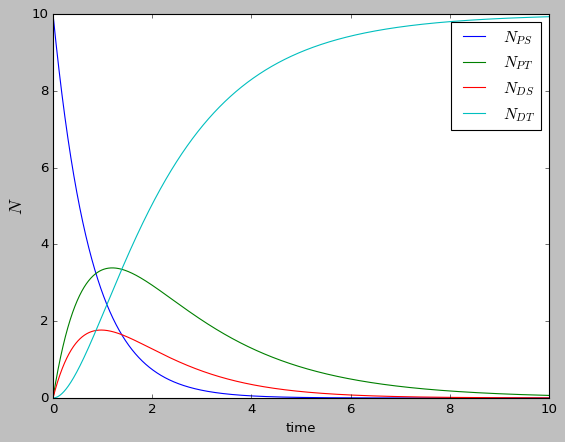

In [35]:
fig = plt.figure(figsize=(8,6))
plt.plot(time,Ns[0,:])
plt.plot(time,Ns[1,:])
plt.plot(time,Ns[2,:])
plt.plot(time,Ns[3,:])
plt.legend(('$N_{PS}$','$N_{PT}$', '$N_{DS}$','$N_{DT}$'))
plt.ylabel('$N$',fontsize=16)
plt.xlabel('time')
